# I. Tiền xử lí dữ liệu

## 1. Import các thư viện cần thiết

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Đọc dataset từ file csv

In [62]:
raw_df = pd.read_csv('Data/DelayedFlights.csv')
raw_df = raw_df.drop("Unnamed: 0", axis=1)

In [63]:
raw_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Vì dataset ban đầu kích cỡ quá lớn, chúng ta sẽ tập trung vào các hoạt động hàng không tại bang `Georgia` (là ban có dân số đông và có lưu lượng hàng không lớn thứ nhất tại Hoa Kỳ vào năm 2008)

In [64]:
georgia_ap = 'ATL, SAV, AGS, BQK, CSG, TBS, KUT, BUS'.split(', ')
mask = raw_df['Origin'].isin(georgia_ap) | raw_df['Dest'].isin(georgia_ap)
sum(mask)

244316

In [65]:
print(f'Tỉ lệ của Georgia so với dataset: {raw_df.shape[0] / sum(mask)}')

Tỉ lệ của Georgia so với dataset: 7.927266327215573


In [66]:
raw_df = raw_df[mask]

## 3. Số dòng và cột

In [67]:
n_rows, n_cols = raw_df.shape
print(f"Dataset có {n_rows} dòng và {n_cols} cột")

Dataset có 244316 dòng và 29 cột


## 4. Ý nghĩa của các dòng

- `Year`: Năm mà chuyến bay được thực hiện.
- `Month`: Tháng mà chuyến bay được thực hiện.
- `DayofMonth`: Ngày của tháng mà chuyến bay được thực hiện.
- `DayOfWeek`: Ngày trong tuần mà chuyến bay được thực hiện (1 = Monday, 2 = Tuesday, ..., 7 = Sunday).
- `DepTime`: Thời gian cất cánh thực tế của chuyến bay (theo giờ địa phương).
- `CRSDepTime`: Thời gian cất cánh dự kiến theo lịch trình (theo giờ địa phương).
- `ArrTime`: Thời gian hạ cánh thực tế của chuyến bay (theo giờ địa phương).
- `CRSArrTime`: Thời gian hạ cánh dự kiến theo lịch trình (theo giờ địa phương).
- `UniqueCarrier`: Mã hãng hàng không duy nhất của chuyến bay.
- `FlightNum`: Số hiệu chuyến bay.
- `TailNum`: Số hiệu đuôi máy bay (số đăng ký máy bay).
- `ActualElapsedTime`: Thời gian bay thực tế (phút).
- `CRSElapsedTime`: Thời gian bay dự kiến theo lịch trình (phút).
- `AirTime`: Thời gian thực tế máy bay bay trên không (phút).
- `ArrDelay`: Thời gian chậm trễ khi hạ cánh (phút, giá trị âm nếu hạ cánh sớm).
- `DepDelay`: Thời gian chậm trễ khi cất cánh (phút, giá trị âm nếu cất cánh sớm).
- `Origin`: Sân bay xuất phát.
- `Dest`: Sân bay đến.
- `Distance`: Khoảng cách giữa sân bay xuất phát và sân bay đến (dặm).
- `TaxiIn`: Thời gian máy bay di chuyển từ đường băng vào cổng (phút).
- `TaxiOut`: Thời gian máy bay di chuyển từ cổng ra đường băng (phút).
- `Cancelled`: Trạng thái hủy chuyến bay (1 = cancelled, 0 = not cancelled).
- `CancellationCode`: Mã lý do hủy chuyến bay
- `Diverted`: Trạng thái chuyển hướng chuyến bay (1 = diverted, 0 = not diverted).
- `CarrierDelay`: Thời gian chậm trễ do hãng hàng không gây ra (phút).
- `WeatherDelay`: Thời gian chậm trễ do thời tiết gây ra (phút).
NASDelay: Thời gian chậm trễ do hệ thống hàng không quốc gia gây ra (phút).
- `SecurityDelay`: Thời gian chậm trễ do vấn đề an ninh gây ra (phút).
- `LateAircraftDelay`: Thời gian chậm trễ do máy bay đến muộn từ chuyến trước gây ra (phút).

## 5. Kiểm tra sự trùng lắp của các dòng

In [68]:
n_dups = raw_df.duplicated().sum()

if n_dups:
    print(f"Dataset có {n_dups} dòng trùng lắp")
else:
    print("Dataset không bị trùng lắp")

Dataset không bị trùng lắp


Ta sẽ xóa các dòng trùng lắp


In [69]:
raw_df.drop_duplicates(inplace=True)

if raw_df.duplicated().sum():
    print(f"Có {raw_df.duplicated().sum()} dòng trùng nhau")
else:
    print("Không có dòng bị trùng")

Không có dòng bị trùng


## 6. Liệu kiểu dữ liệu của các cột đã hợp lý hay chưa?

In [70]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244316 entries, 30748 to 1936757
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               244316 non-null  int64  
 1   Month              244316 non-null  int64  
 2   DayofMonth         244316 non-null  int64  
 3   DayOfWeek          244316 non-null  int64  
 4   DepTime            244316 non-null  float64
 5   CRSDepTime         244316 non-null  int64  
 6   ArrTime            243649 non-null  float64
 7   CRSArrTime         244316 non-null  int64  
 8   UniqueCarrier      244316 non-null  object 
 9   FlightNum          244316 non-null  int64  
 10  TailNum            244315 non-null  object 
 11  ActualElapsedTime  243526 non-null  float64
 12  CRSElapsedTime     244300 non-null  float64
 13  AirTime            243526 non-null  float64
 14  ArrDelay           243526 non-null  float64
 15  DepDelay           244316 non-null  float64
 1

Kiểu dữ liệu các cột khá hợp lí.   
Tuy nhiên: các cột `Year`, `Month`, `DayofMonth`, `DayOfWeek`, `Cancelled`, `Diverted`  nên là kiểu categorical

Đổi lại kiểu dữ liệu cho các cột

In [71]:
categorical_columns = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Cancelled', 'Diverted']
for col in categorical_columns:
    if col in raw_df.columns:
        raw_df[col] = raw_df[col].astype('category')

## 7. Kiểm tra  missing values

In [72]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244316 entries, 30748 to 1936757
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Year               244316 non-null  category
 1   Month              244316 non-null  category
 2   DayofMonth         244316 non-null  category
 3   DayOfWeek          244316 non-null  category
 4   DepTime            244316 non-null  float64 
 5   CRSDepTime         244316 non-null  int64   
 6   ArrTime            243649 non-null  float64 
 7   CRSArrTime         244316 non-null  int64   
 8   UniqueCarrier      244316 non-null  object  
 9   FlightNum          244316 non-null  int64   
 10  TailNum            244315 non-null  object  
 11  ActualElapsedTime  243526 non-null  float64 
 12  CRSElapsedTime     244300 non-null  float64 
 13  AirTime            243526 non-null  float64 
 14  ArrDelay           243526 non-null  float64 
 15  DepDelay           244316 non

Tính tỉ lệ missing-values của các cột

In [73]:
raw_df.apply(lambda col: 1 -col.isna().sum() / len(col))

Year                 1.000000
Month                1.000000
DayofMonth           1.000000
DayOfWeek            1.000000
DepTime              1.000000
CRSDepTime           1.000000
ArrTime              0.997270
CRSArrTime           1.000000
UniqueCarrier        1.000000
FlightNum            1.000000
TailNum              0.999996
ActualElapsedTime    0.996766
CRSElapsedTime       0.999935
AirTime              0.996766
ArrDelay             0.996766
DepDelay             1.000000
Origin               1.000000
Dest                 1.000000
Distance             1.000000
TaxiIn               0.997270
TaxiOut              0.999820
Cancelled            1.000000
CancellationCode     1.000000
Diverted             1.000000
CarrierDelay         0.668773
WeatherDelay         0.668773
NASDelay             0.668773
SecurityDelay        0.668773
LateAircraftDelay    0.668773
dtype: float64

- Nhìn chung, có nhiều cột có missing-values khá nhiều
- Do ta đang quan sát delay,và dữ liệu của ta có đến 952,929 dòng nên ta sẽ drop hết những dòng có missing-values

Drop các dòng thiếu giá trị

In [74]:
raw_df = raw_df.dropna().reset_index(drop=True)

Kiểm tra lại số lượng missing-values

In [75]:
print(f'Số lượng missing-values: {raw_df.isna().sum()}')

Số lượng missing-values: Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


Xem lại shape

In [76]:
n_rows, n_cols = raw_df.shape
print(f"Dataset có {n_rows} dòng và {n_cols} cột")

Dataset có 163392 dòng và 29 cột


- Sau khi drop các dòng có missing values, ta vẫn còn khá nhiều dữ liệu

## 8. Xem xét summary statistics của các cột Numerical

In [77]:
raw_df.describe(include='number')

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,163392.000000,163392.000000,163392.000000,163392.000000,163392.000000,163392.000000,163392.000000,163392.000000,163392.000000,163392.000000,163392.000000,163392.000000,163392.000000,163392.000000,163392.000000,163392.000000,163392.000000,163392.000000
mean,1560.541648,1495.634382,1623.460567,1650.874351,2479.408202,125.849173,120.770350,94.796349,63.574514,58.495691,636.610336,8.740434,22.312390,21.456699,5.030320,16.281905,0.038656,20.766935
std,459.763551,420.350569,568.588727,444.406933,2021.464903,58.390854,55.024391,54.627399,59.502532,58.683015,441.743611,6.840219,16.227233,44.615858,24.068936,34.243473,1.913095,39.951499
min,1.000000,15.000000,1.000000,0.000000,5.000000,27.000000,2.000000,4.000000,15.000000,6.000000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1233.000000,1200.000000,1330.000000,1344.000000,728.000000,89.000000,86.000000,61.000000,25.000000,22.000000,366.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1615.000000,1525.000000,1728.000000,1709.000000,1621.000000,114.000000,110.000000,85.000000,42.000000,39.000000,554.000000,7.000000,18.000000,4.000000,0.000000,4.000000,0.000000,0.000000
75%,1923.000000,1835.000000,2048.000000,2017.000000,4544.000000,144.000000,138.000000,109.000000,80.000000,74.000000,745.000000,10.000000,27.000000,24.000000,0.000000,16.000000,0.000000,25.000000
max,2400.000000,2359.000000,2400.000000,2359.000000,9740.000000,697.000000,604.000000,609.000000,1175.000000,1206.000000,4502.000000,197.000000,383.000000,1175.000000,876.000000,745.000000,392.000000,917.000000


Nhận xét

- Nhìn chung, giá trị các cột không có gì bất thường

Ta sẽ visualize các cột liên quan đến delay để xem phân phối và các outlier

In [78]:
columns_to_plot = [
    'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
    'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
    'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut','CarrierDelay',
    'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'
]

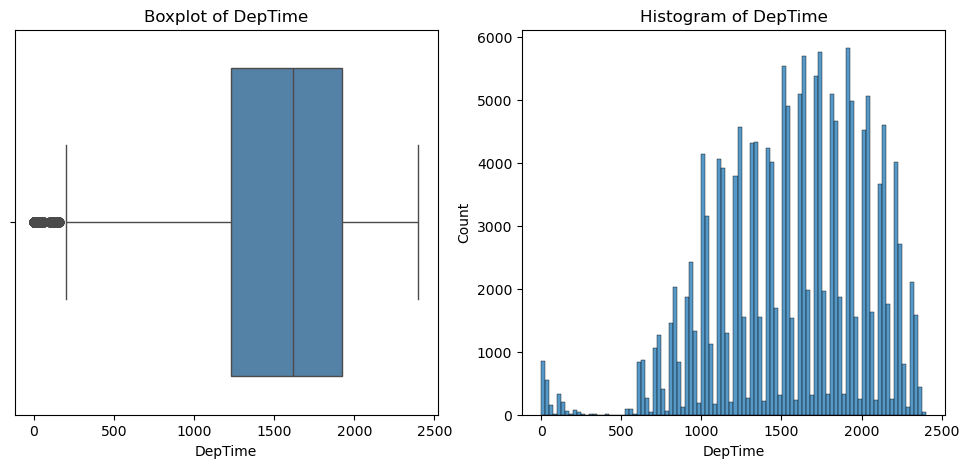

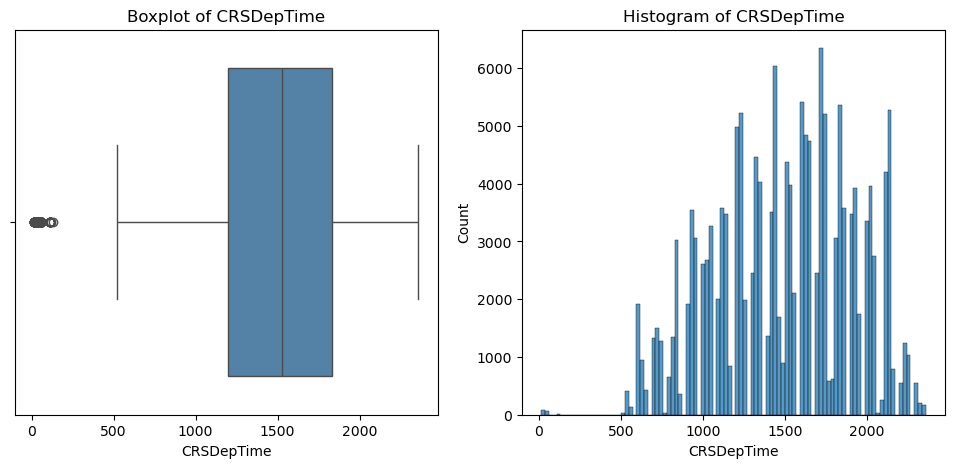

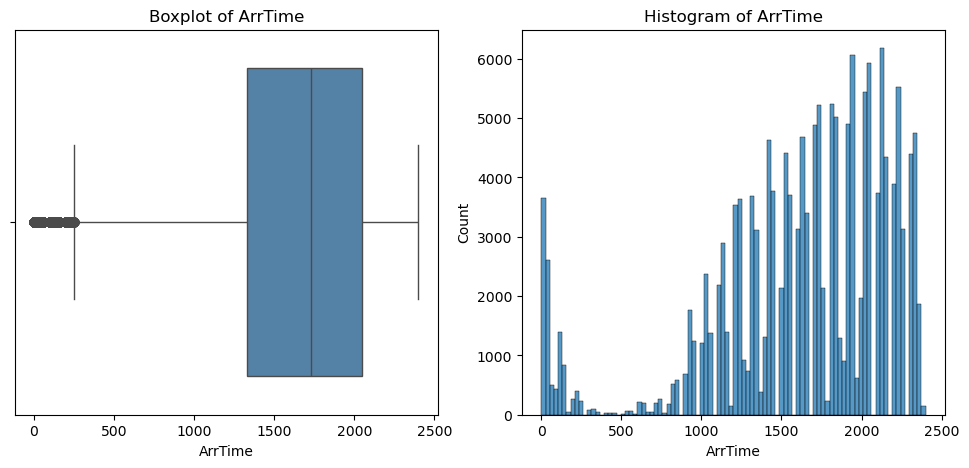

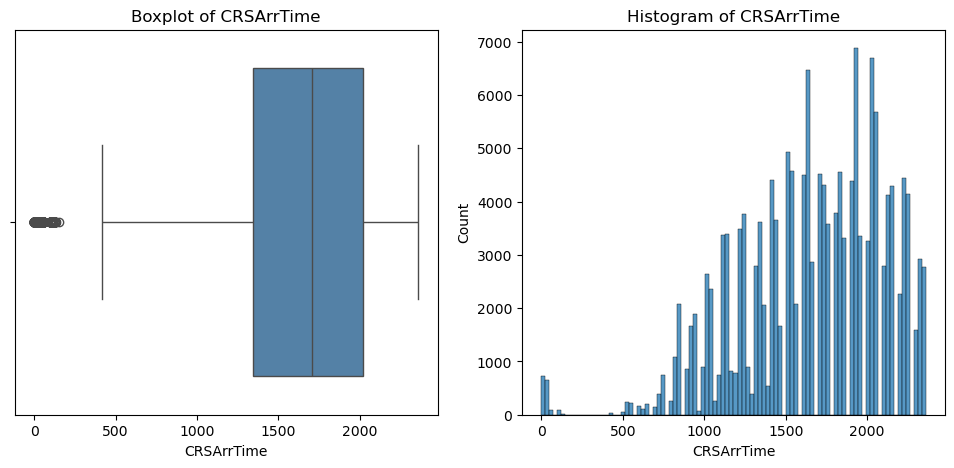

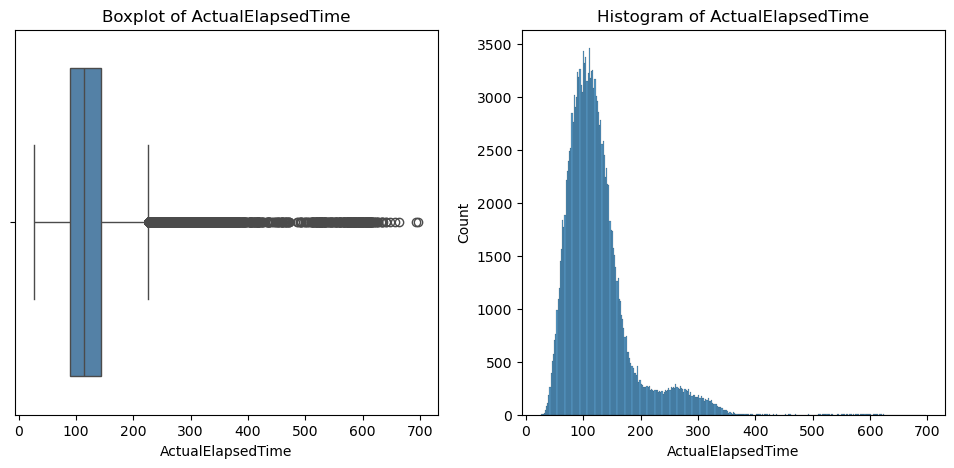

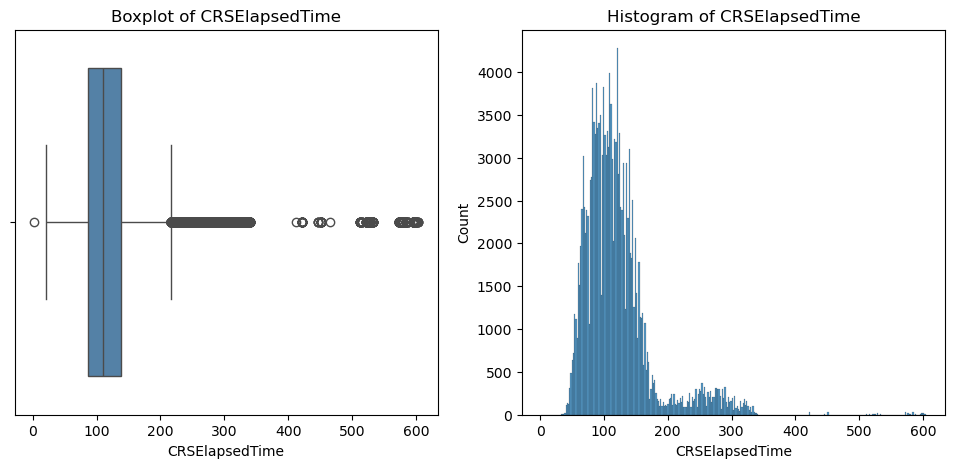

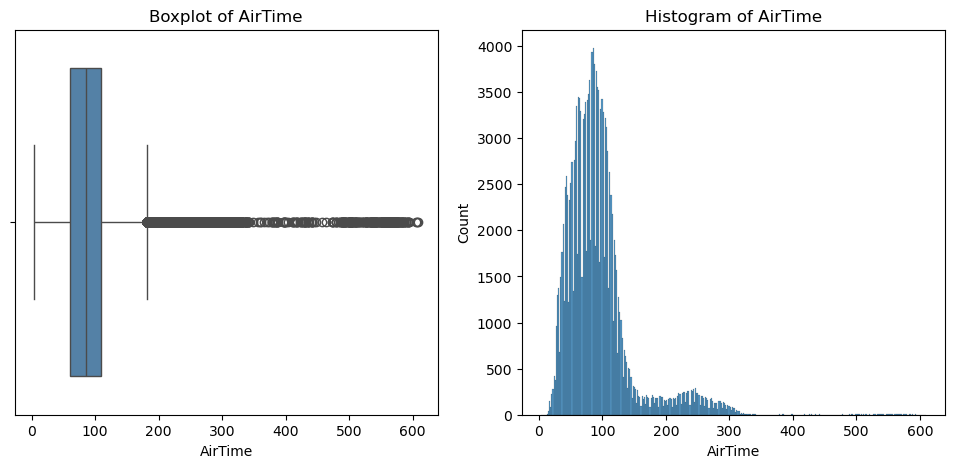

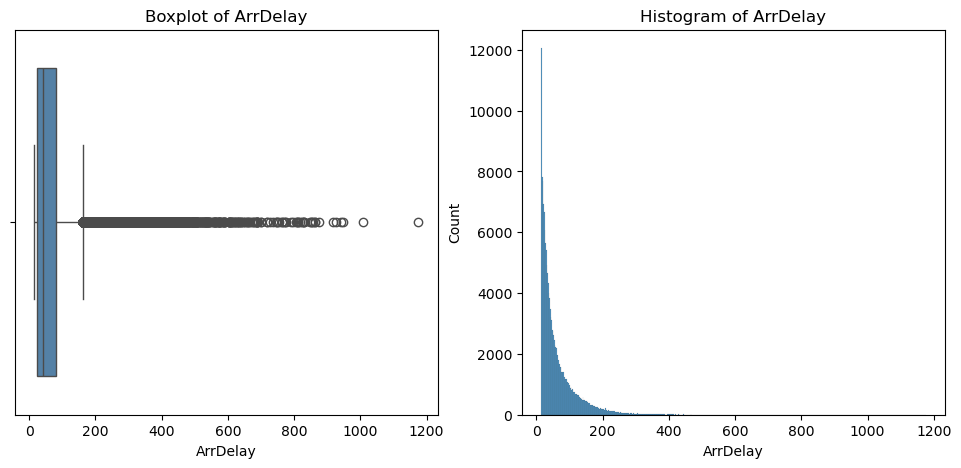

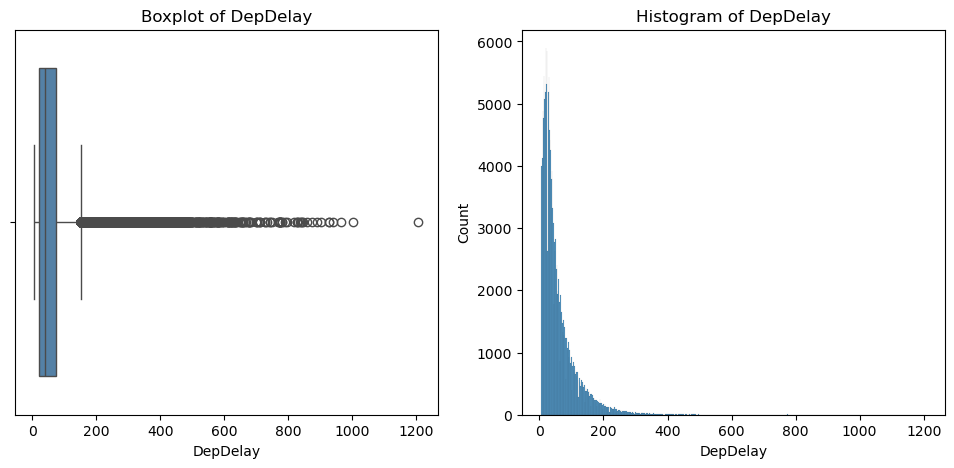

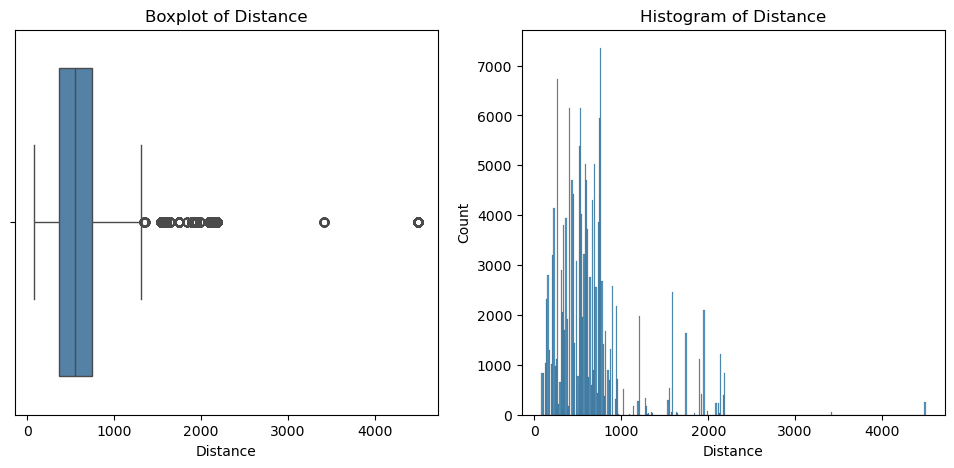

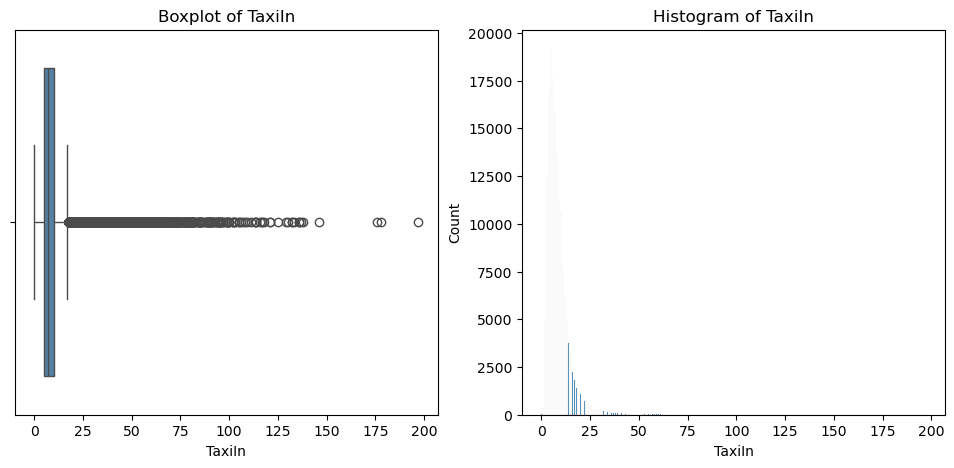

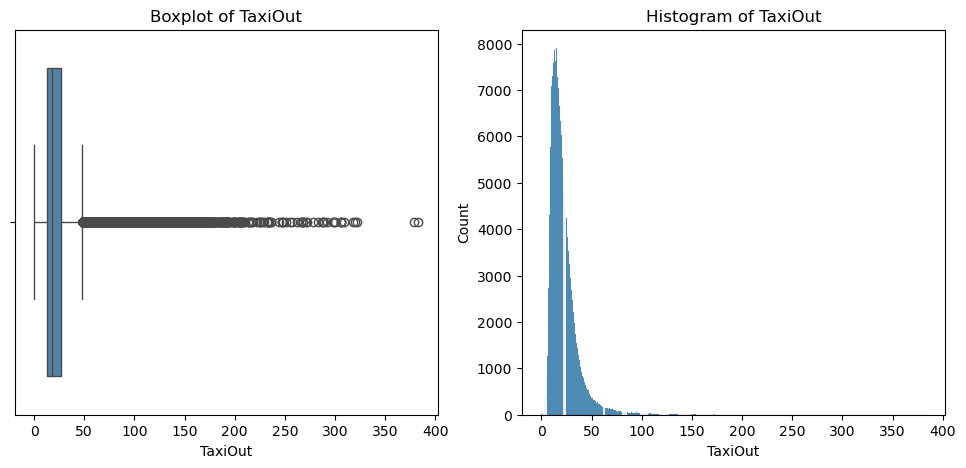

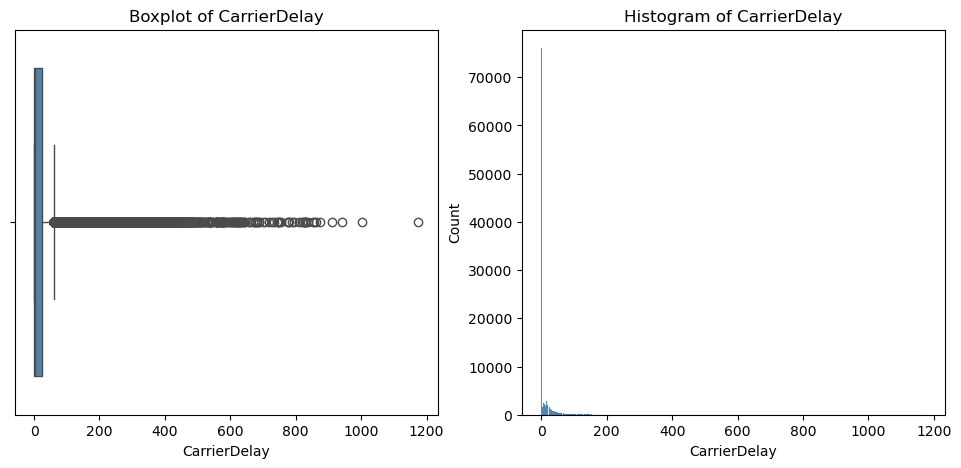

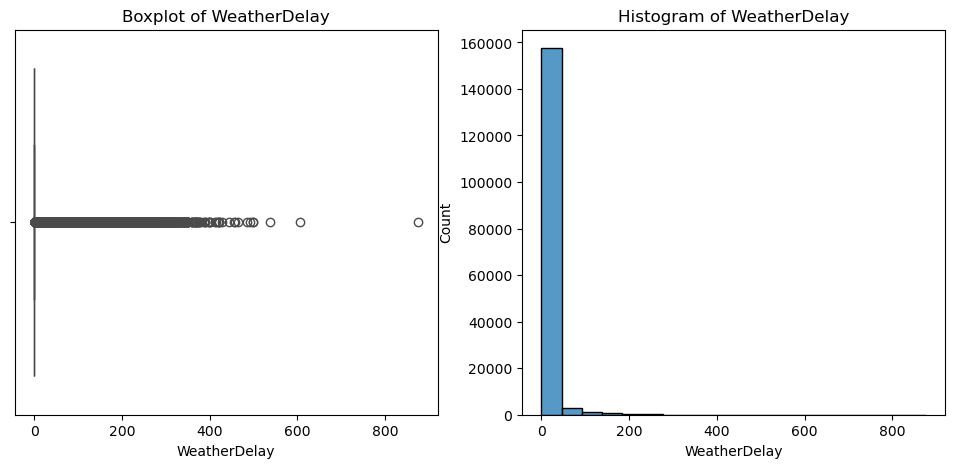

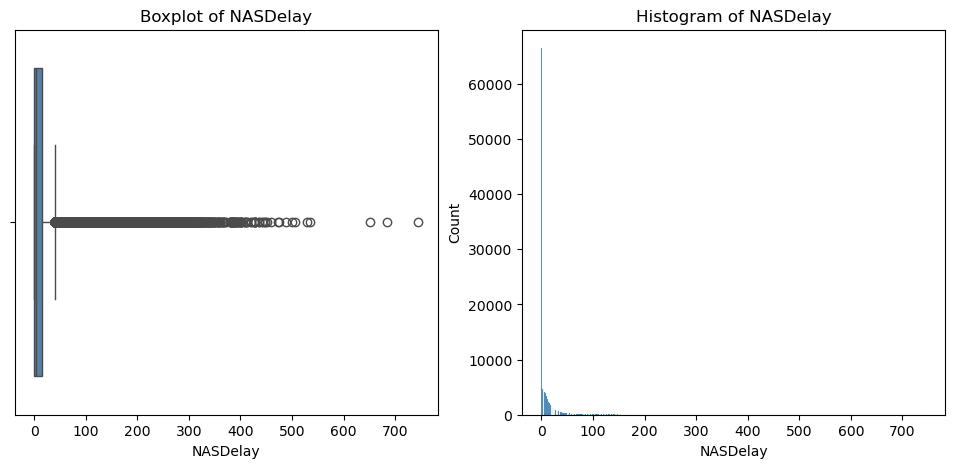

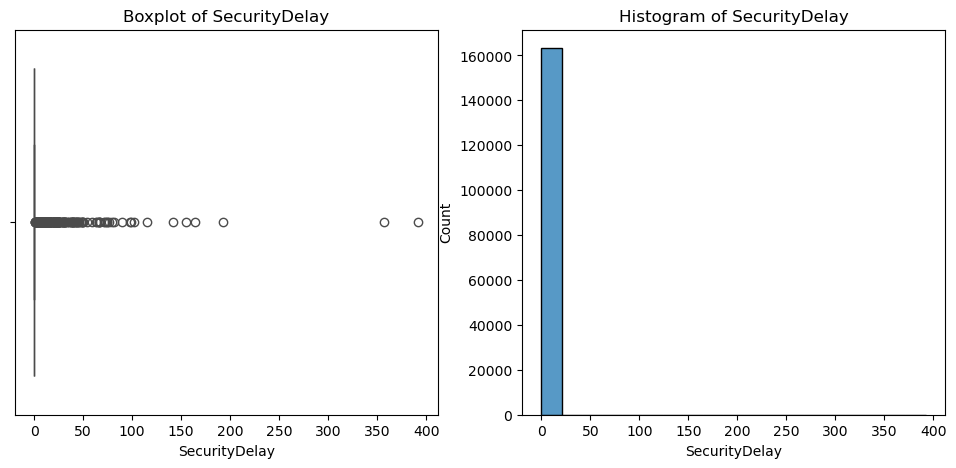

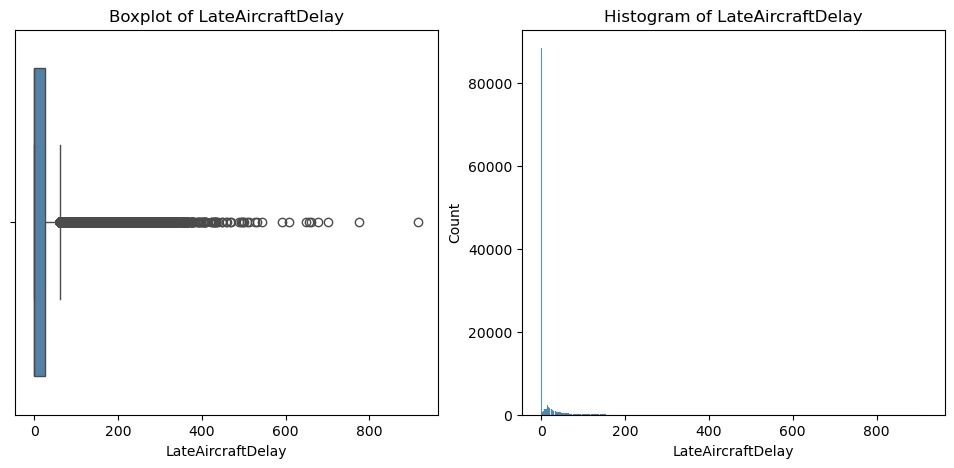

In [79]:
def hist_box_plot(df, feature):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    filtered = df.loc[~np.isnan(df[feature]), feature]

    sns.boxplot(x=filtered, ax=ax1, color='steelblue')
    ax1.set_title(f'Boxplot of {feature}')

    sns.histplot(filtered,  ax=ax2)
    ax2.set_title(f'Histogram of {feature}')

    plt.show()

for col in columns_to_plot:
    hist_box_plot(raw_df, col)

Nhận xét

- Nhìn chung dữ liệu tương đối khá nhiều outliers
- Tuy nhiên, do đây là dữ liệu thực tế, nên ta tạm thời không xử lí các outliers này.

## 9. Xem xét các cột Categorical

In [80]:
categorical_cols = raw_df.select_dtypes(include=["category", "object"]).columns.tolist()
raw_df[categorical_cols].head()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,TailNum,Origin,Dest,Cancelled,CancellationCode,Diverted
0,2008,1,15,2,XE,N12996,IAH,SAV,0,N,0
1,2008,1,19,6,XE,N14998,EWR,ATL,0,N,0
2,2008,1,20,7,XE,N16151,ATL,EWR,0,N,0
3,2008,1,31,4,XE,N29906,IAH,SAV,0,N,0
4,2008,1,2,3,XE,N16919,SAV,EWR,0,N,0


Vẽ countplot để xem xét các giá trị trong categorical_cols

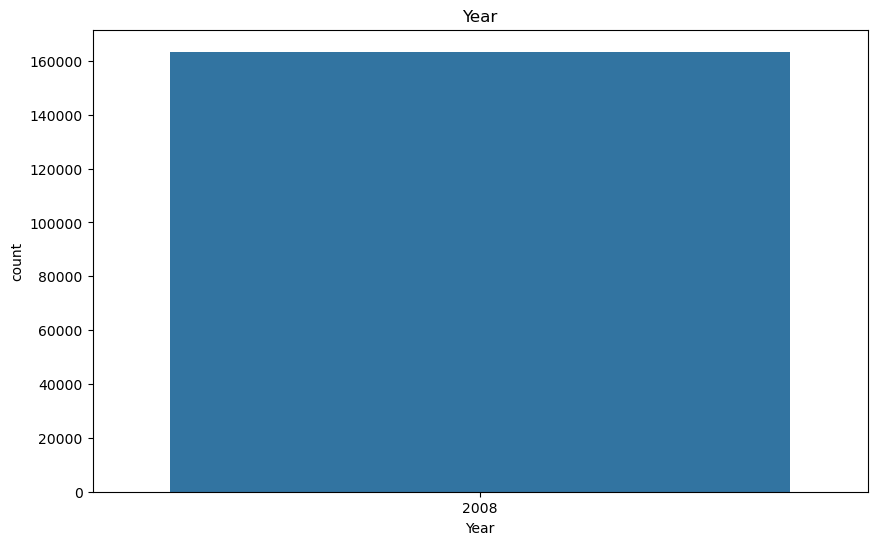

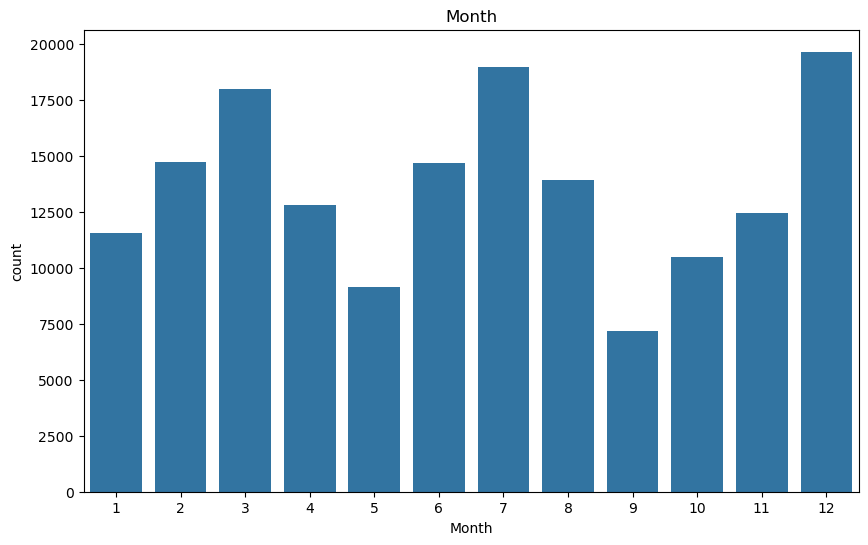

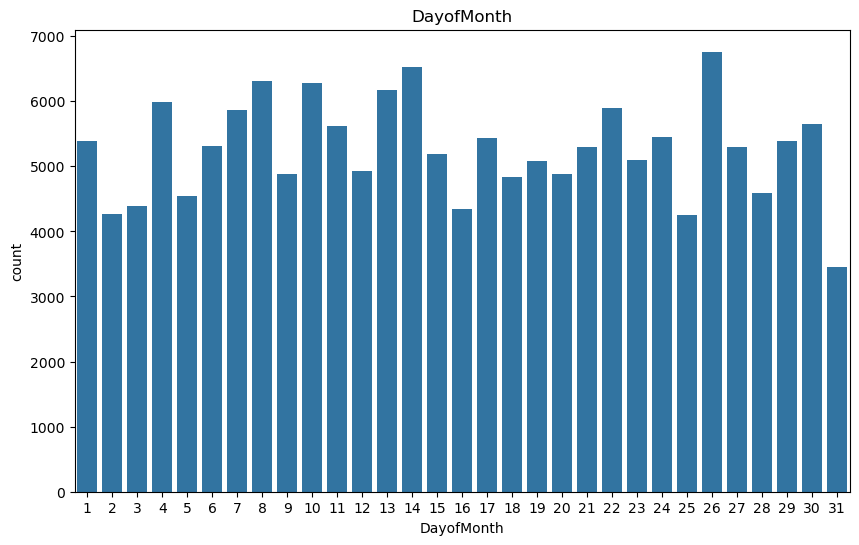

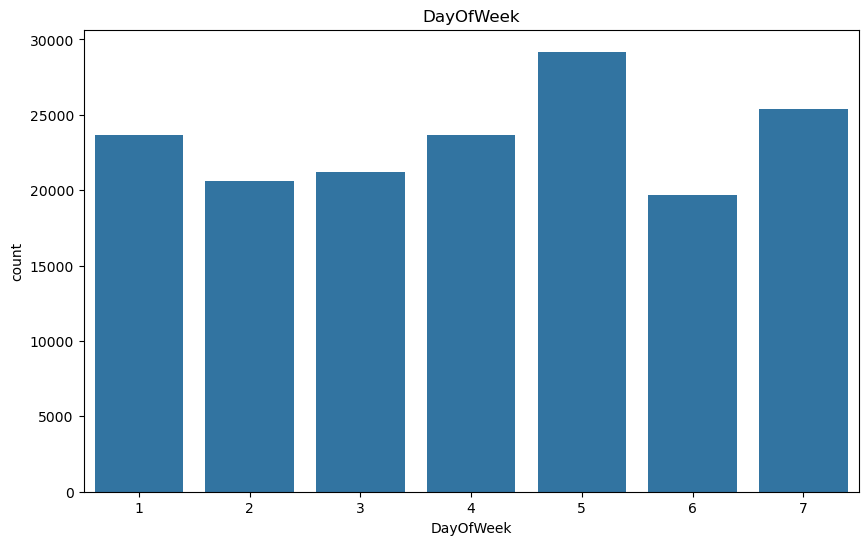

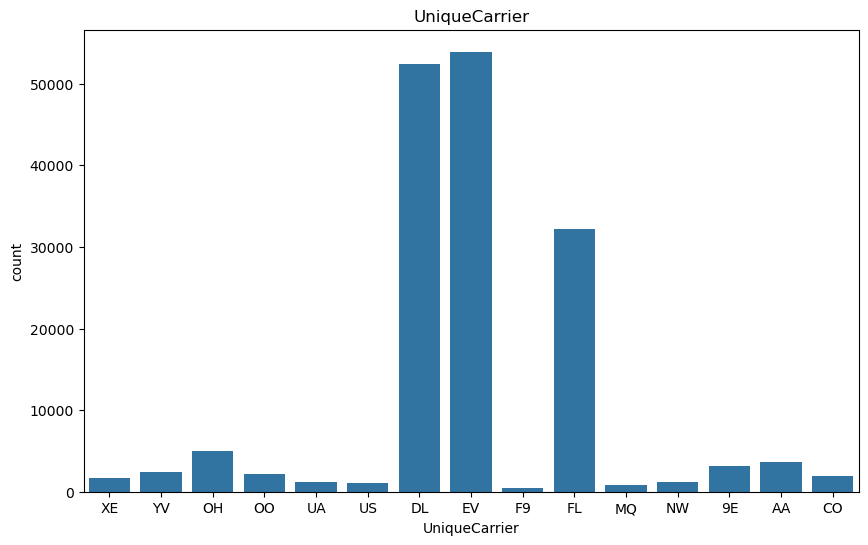

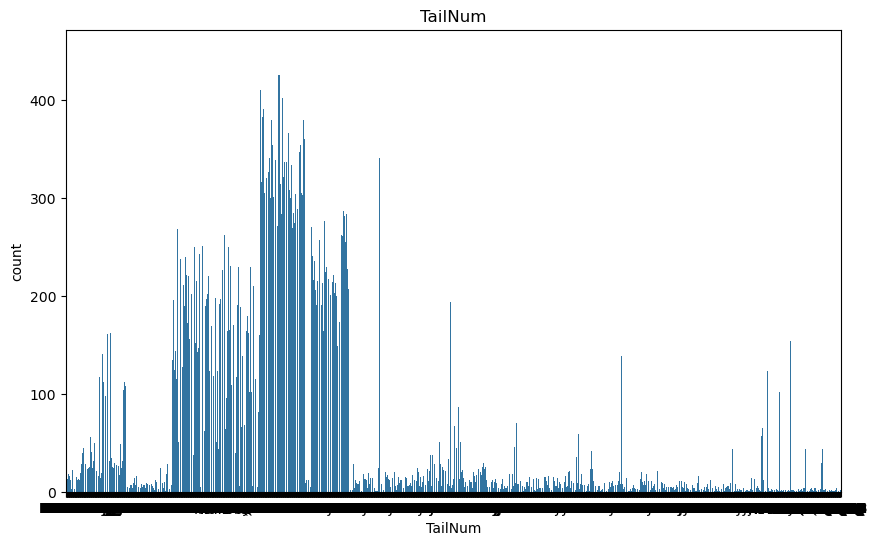

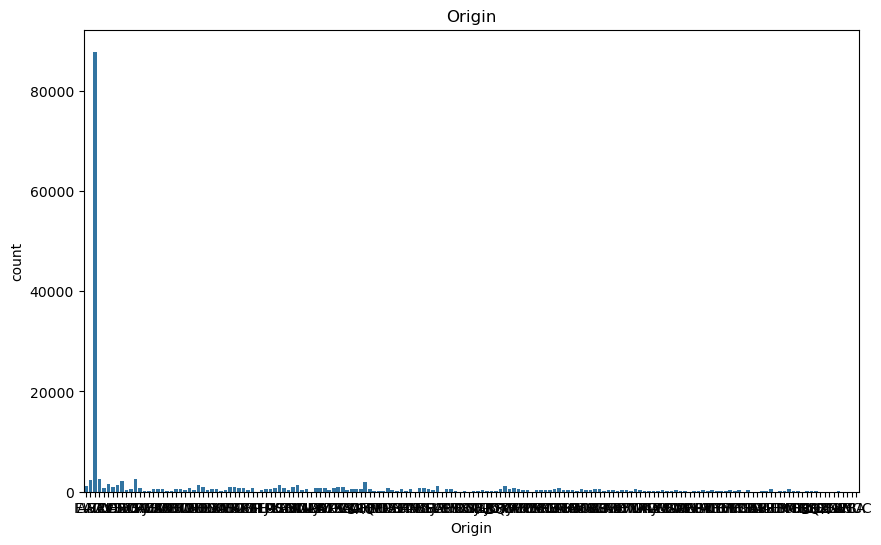

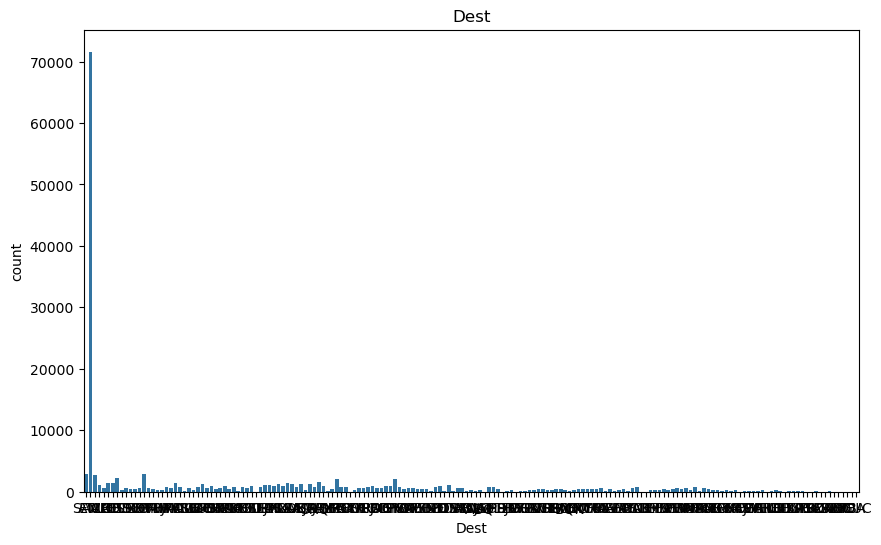

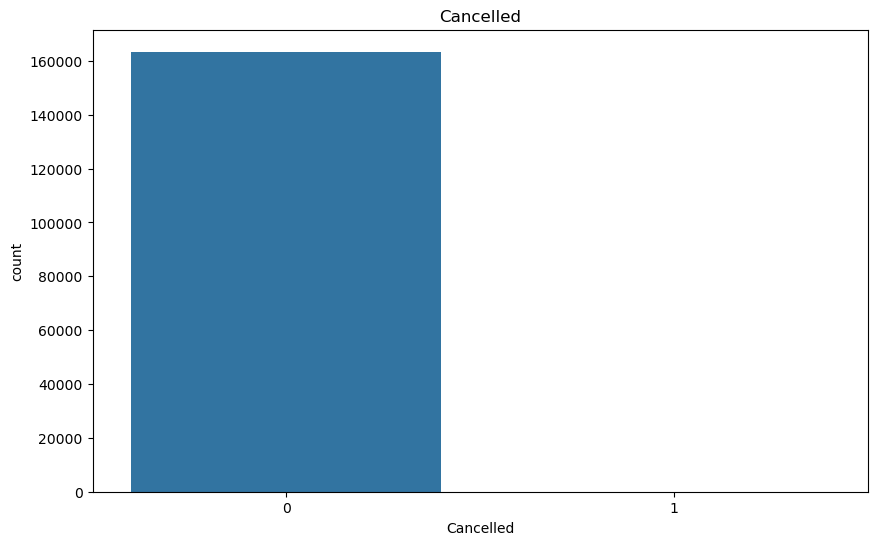

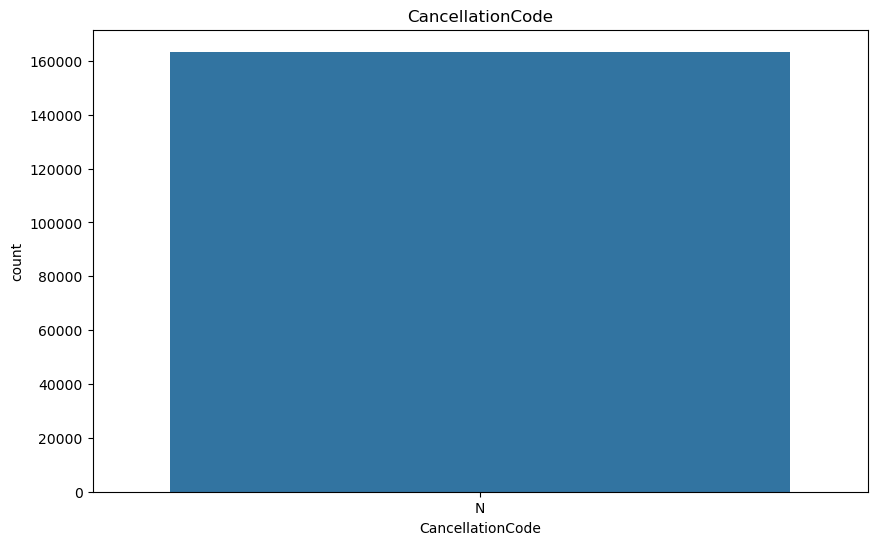

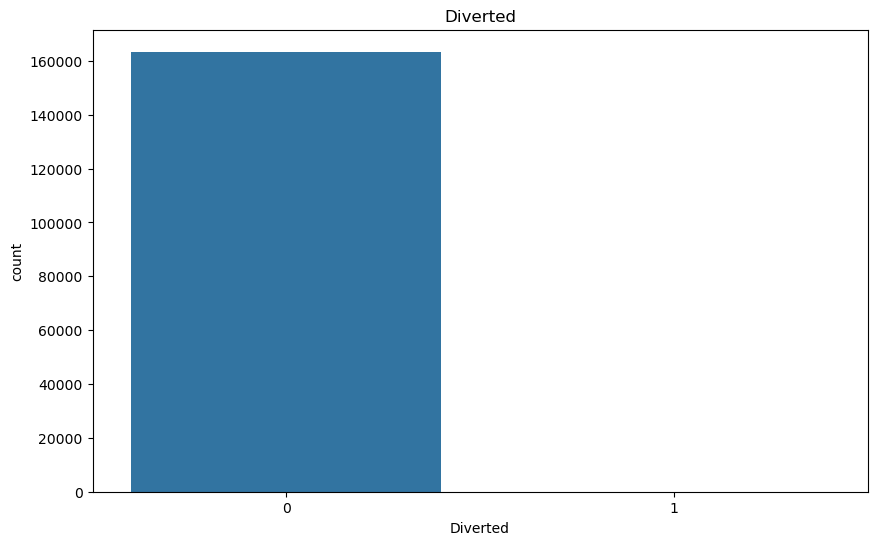

In [81]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=raw_df, x=col)
    plt.title(f'{col}')
    plt.show()

- Dù dữ liệu mới được cập nhật cách đây 4 năm, nhưng tất cả đều được ghi nhận trong đúng 1 năm 2008.
- Những cột chỉ có đúng 1 giá trị có thể bỏ đi.

Ta sẽ xóa cột `CancellationCode`, `Diverted` và `Year` do không cần thiết

In [82]:
raw_df = raw_df.drop("CancellationCode", axis=1)
raw_df = raw_df.drop("Diverted", axis=1)
raw_df = raw_df.drop("Year", axis=1)

## 10. Kiểm tra lại shape của data và lưu lại cho các bước xử lý tiếp theo

In [83]:
raw_df.shape

(163392, 26)

In [84]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163392 entries, 0 to 163391
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Month              163392 non-null  category
 1   DayofMonth         163392 non-null  category
 2   DayOfWeek          163392 non-null  category
 3   DepTime            163392 non-null  float64 
 4   CRSDepTime         163392 non-null  int64   
 5   ArrTime            163392 non-null  float64 
 6   CRSArrTime         163392 non-null  int64   
 7   UniqueCarrier      163392 non-null  object  
 8   FlightNum          163392 non-null  int64   
 9   TailNum            163392 non-null  object  
 10  ActualElapsedTime  163392 non-null  float64 
 11  CRSElapsedTime     163392 non-null  float64 
 12  AirTime            163392 non-null  float64 
 13  ArrDelay           163392 non-null  float64 
 14  DepDelay           163392 non-null  float64 
 15  Origin             163392 non-null

Lưu dữ liệu đã qua xử lí

In [85]:
raw_df.to_csv("Data/DelayedFlights_cleaned.csv", index=False)